### Import Libraries

In [1]:
#Importing Libraries
import nasdaqdatalink
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')


### Import Dataset

In [2]:
# Configure API key 
nasdaqdatalink.ApiConfig.api_key = 'my_API_key'

In [3]:
nasdaqdatalink.get_table('ZILLOW/DATA')

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,99999,2025-01-31,457847.242831
1,ZSFH,99999,2024-12-31,457250.597887
2,ZSFH,99999,2024-11-30,456891.816779
3,ZSFH,99999,2024-10-31,456998.542716
4,ZSFH,99999,2024-09-30,456517.913569
...,...,...,...,...
9995,ZSFH,99960,2004-09-30,230776.073786
9996,ZSFH,99960,2004-08-31,228650.963970
9997,ZSFH,99960,2004-07-31,226093.257465


In [4]:
nasdaqdatalink.get_table('ZILLOW/REGIONS')

,region_id,region_type,region
None,,,
0,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County"
1,99998,zip,98846;WA;nan;Pateros;Okanogan County
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844;WA;nan;Oroville;Okanogan County
4,99995,zip,"98843;WA;Wenatchee, WA;Orondo;Douglas County"
...,...,...,...
9995,87003,zip,"65783; MO; Springfield, MO; Dallas County; Win..."
9996,87002,zip,"65781;MO;Springfield, MO;Willard;Greene County"
9997,87001,zip,65779;MO;nan;nan;Hickory County


In [5]:
# Extracting zip codes and name of county from ZILLOW/REGIONS

In [8]:
zillow_regions = nasdaqdatalink.get_table('ZILLOW/REGIONS')

In [10]:
import re

# Function to extract zipcode and county
def extract_zipcode_and_county(region):
    # Regular expression to extract the zipcode (first numeric part) and county (last part after semicolon)
    match = re.match(r"(\d{5});.*?;.*?;.*?;([^;]+)$", region)
    
    if match:
        zipcode = match.group(1)  # Zipcode (first group)
        county = match.group(2)   # County (second group)
        return zipcode, county
    else:
        return None, None

# Load the dataset
zillow_regions = nasdaqdatalink.get_table('ZILLOW/REGIONS')

# Apply the extraction to the 'region' column and create two new columns
zillow_regions['zipcode'], zillow_regions['county'] = zip(*zillow_regions['region'].apply(extract_zipcode_and_county))

# Display the results with the new columns
print(zillow_regions[['region', 'zipcode', 'county']].head())

                                                region zipcode  \
None                                                             
0     98847;WA;Wenatchee, WA;Leavenworth;Chelan County   98847   
1                 98846;WA;nan;Pateros;Okanogan County   98846   
2      98845; WA; Wenatchee; Douglas County; Palisades   98845   
3                98844;WA;nan;Oroville;Okanogan County   98844   
4         98843;WA;Wenatchee, WA;Orondo;Douglas County   98843   

               county  
None                   
0       Chelan County  
1     Okanogan County  
2           Palisades  
3     Okanogan County  
4      Douglas County  


In [12]:
zillow_regions.head()

,region_id,region_type,region,zipcode,county
None,,,,,
0,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County",98847,Chelan County
1,99998,zip,98846;WA;nan;Pateros;Okanogan County,98846,Okanogan County
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades,98845,Palisades
3,99996,zip,98844;WA;nan;Oroville;Okanogan County,98844,Okanogan County
4,99995,zip,"98843;WA;Wenatchee, WA;Orondo;Douglas County",98843,Douglas County


In [13]:
# Printing all rows
pd.options.display.max_rows = None

In [14]:
zillow_regions['county'].value_counts().sort_index(ascending=True)

county
 Abbyville                         1
 Abita Springs                     1
 Achille                           1
 Ackerly                           1
 Adams                             1
 Adona                             1
 Agua Dulce                        1
 Albin                             1
 Alcova                            1
 Alderson                          1
 Almo                              1
 Altheimer                         1
 Amanda Park                       1
 Anahuac                           1
 Antelope                          1
 Anthony                           1
 Aransas Pass                      1
 Arapahoe                          1
 Arcadia                           1
 Arimo                             1
 Arivaca                           1
 Arroyo Hondo                      1
 Arroyo Seco                       2
 Arvada                            1
 Ashdown                           1
 Ashford                           1
 Atlanta                       

In [15]:
king_county = zillow_regions[zillow_regions['county']=='King County']

In [16]:
king_county.head()

,region_id,region_type,region,zipcode,county
None,,,,,
251,99693,zip,"98288;WA;Seattle-Tacoma-Bellevue, WA;Skykomish...",98288,King County
303,99637,zip,"98224;WA;Seattle-Tacoma-Bellevue, WA;Gold Bar;...",98224,King County
314,99624,zip,"98199;WA;Seattle-Tacoma-Bellevue, WA;Seattle;K...",98199,King County
315,99623,zip,"98198;WA;Seattle-Tacoma-Bellevue, WA;Des Moine...",98198,King County
317,99618,zip,"98188;WA;Seattle-Tacoma-Bellevue, WA;Seatac;Ki...",98188,King County


In [17]:
# Dropping columns region_type and region
king_county.drop(columns =['region_type','region'])

,region_id,zipcode,county
None,,,
251,99693,98288,King County
303,99637,98224,King County
314,99624,98199,King County
315,99623,98198,King County
317,99618,98188,King County
318,99614,98178,King County
319,99613,98177,King County
321,99608,98168,King County
322,99607,98166,King County


In [18]:
# Checking the unique region ids in King County
unique_region_ids = king_county['region_id'].unique()

In [19]:
unique_region_ids

array(['99693', '99637', '99624', '99623', '99618', '99614', '99613',
       '99608', '99607', '99605', '99601', '99598', '99597', '99595',
       '99591', '99590', '99589', '99584', '99583', '99581', '99580',
       '99579', '99578', '99577', '99576', '99575', '99572', '99569',
       '99568', '99567', '99566', '99565', '99564', '99563', '99562',
       '99561', '99559', '99554', '99553', '99552', '99550', '99548',
       '99546', '99541', '99540', '99539', '99538', '99537', '99535',
       '99534', '99533', '99532', '99531', '99529', '99527', '99525',
       '99524', '99523', '99519', '99518', '99517', '99516', '99515',
       '99514', '99513', '99512', '99509', '99508', '99507', '99504',
       '99502', '99499', '99498', '99496', '99495', '99494', '99493',
       '99492', '99491', '99490', '99489'], dtype=object)

In [20]:
# Getting the right zillow data
# List of region_ids
region_ids = [
    99693, 99637, 99624, 99623, 99618, 99614, 99613, 99608, 99607, 
    99605, 99601, 99598, 99597, 99595, 99591, 99590, 99589, 99584, 
    99583, 99581, 99580, 99579, 99578, 99577, 99576, 99575, 99572, 
    99569, 99568, 99567, 99566, 99565, 99564, 99563, 99562, 99561, 
    99559, 99554, 99553, 99552, 99550, 99548, 99546, 99541, 99540, 
    99539, 99538, 99537, 99535, 99534, 99533, 99532, 99531, 99529, 
    99527, 99525, 99524, 99523, 99519, 99518, 99517, 99516, 99515, 
    99514, 99513, 99512, 99509, 99508, 99507, 99504, 99502, 99499, 
    99498, 99496, 99495, 99494, 99493, 99492, 99491, 99490, 99489
]

# Query data for multiple region_ids
zillow_data = nasdaqdatalink.get_table('ZILLOW/DATA', region_id=region_ids)

In [21]:
zillow_data.head()

,indicator_id,region_id,date,value
None,,,,
0,ZSFH,99693,2025-01-31,424707.133696
1,ZSFH,99693,2024-12-31,423847.180553
2,ZSFH,99693,2024-11-30,422737.042995
3,ZSFH,99693,2024-10-31,423638.904312
4,ZSFH,99693,2024-09-30,423800.805458


In [22]:
# Merging ZILLOW/REGIONS with king_county

In [23]:
king_county_date_values = pd.merge(king_county, zillow_data, on=['region_id'], how='inner')

In [24]:
king_county_date_values.head()

,region_id,region_type,region,zipcode,county,indicator_id,date,value
0,99693,zip,"98288;WA;Seattle-Tacoma-Bellevue, WA;Skykomish...",98288,King County,ZSFH,2025-01-31,424707.133696
1,99693,zip,"98288;WA;Seattle-Tacoma-Bellevue, WA;Skykomish...",98288,King County,ZSFH,2024-12-31,423847.180553
2,99693,zip,"98288;WA;Seattle-Tacoma-Bellevue, WA;Skykomish...",98288,King County,ZSFH,2024-11-30,422737.042995
3,99693,zip,"98288;WA;Seattle-Tacoma-Bellevue, WA;Skykomish...",98288,King County,ZSFH,2024-10-31,423638.904312
4,99693,zip,"98288;WA;Seattle-Tacoma-Bellevue, WA;Skykomish...",98288,King County,ZSFH,2024-09-30,423800.805458


In [25]:
king_county_date_values.shape

(10000, 8)

### Subsetting, Wrangling, and Cleaning Time Series Data

In [30]:
# Dropping Unnecessary Columns 
data = king_county_date_values.drop(columns = ['region_id', 'region_type', 'zipcode', 'county', 'region','indicator_id'])	

In [31]:
data.head()

,date,value
0,2025-01-31,424707.133696
1,2024-12-31,423847.180553
2,2024-11-30,422737.042995
3,2024-10-31,423638.904312
4,2024-09-30,423800.805458


In [32]:
# Grouping the 'date' and calculating the mean 'value' (price) for each date in King County Area
king_county_avg_price = data.groupby('date')['value'].mean().reset_index()

In [34]:
king_county_avg_price.head()

,date,value
0,1996-01-31,181643.214286
1,1996-02-29,181774.321429
2,1996-03-31,181823.000000
3,1996-04-30,181878.321429
4,1996-05-31,181894.857143


In [35]:
# Setting the "date" column as the index
from datetime import datetime
king_county_avg_price['datetime'] = pd.to_datetime(king_county_avg_price['date']) 
king_county_avg_price = king_county_avg_price.set_index('datetime') 
king_county_avg_price.drop(['date'], axis=1, inplace=True) 
king_county_avg_price.head()

,value
datetime,
1996-01-31,181643.214286
1996-02-29,181774.321429
1996-03-31,181823.000000
1996-04-30,181878.321429
1996-05-31,181894.857143


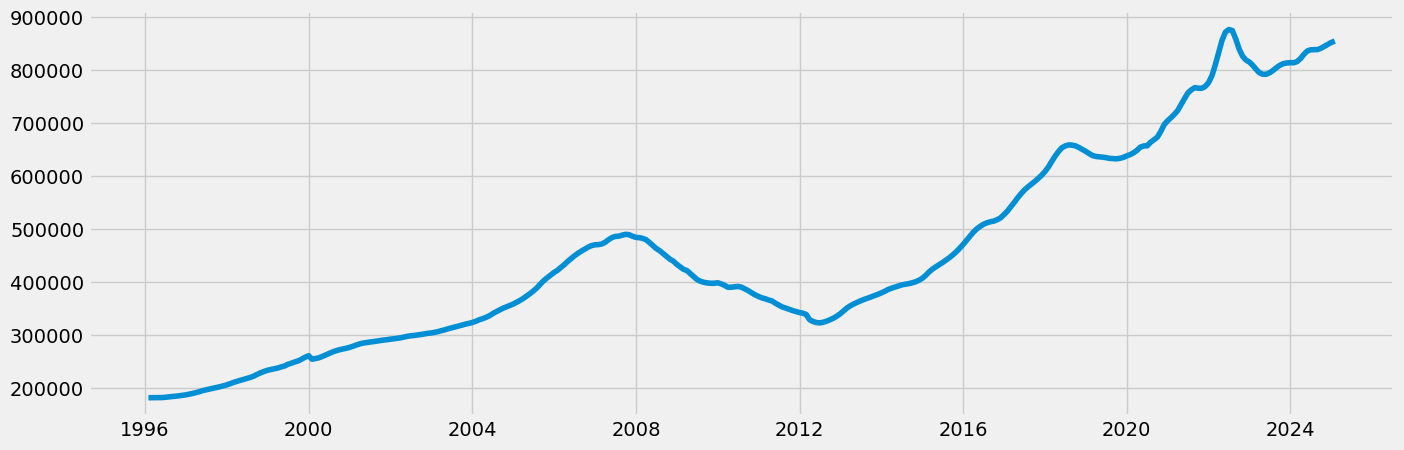

In [36]:
# Plotting the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(king_county_avg_price)

In [37]:
# Checking for missing values 
king_county_avg_price.isnull().sum()

value    0
dtype: int64

In [38]:
# Checking for duplicates
dups = king_county_avg_price.duplicated()
dups.sum()

np.int64(0)

### Time Series Analysis

In [39]:
# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(king_county_avg_price, model='addictive')

from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

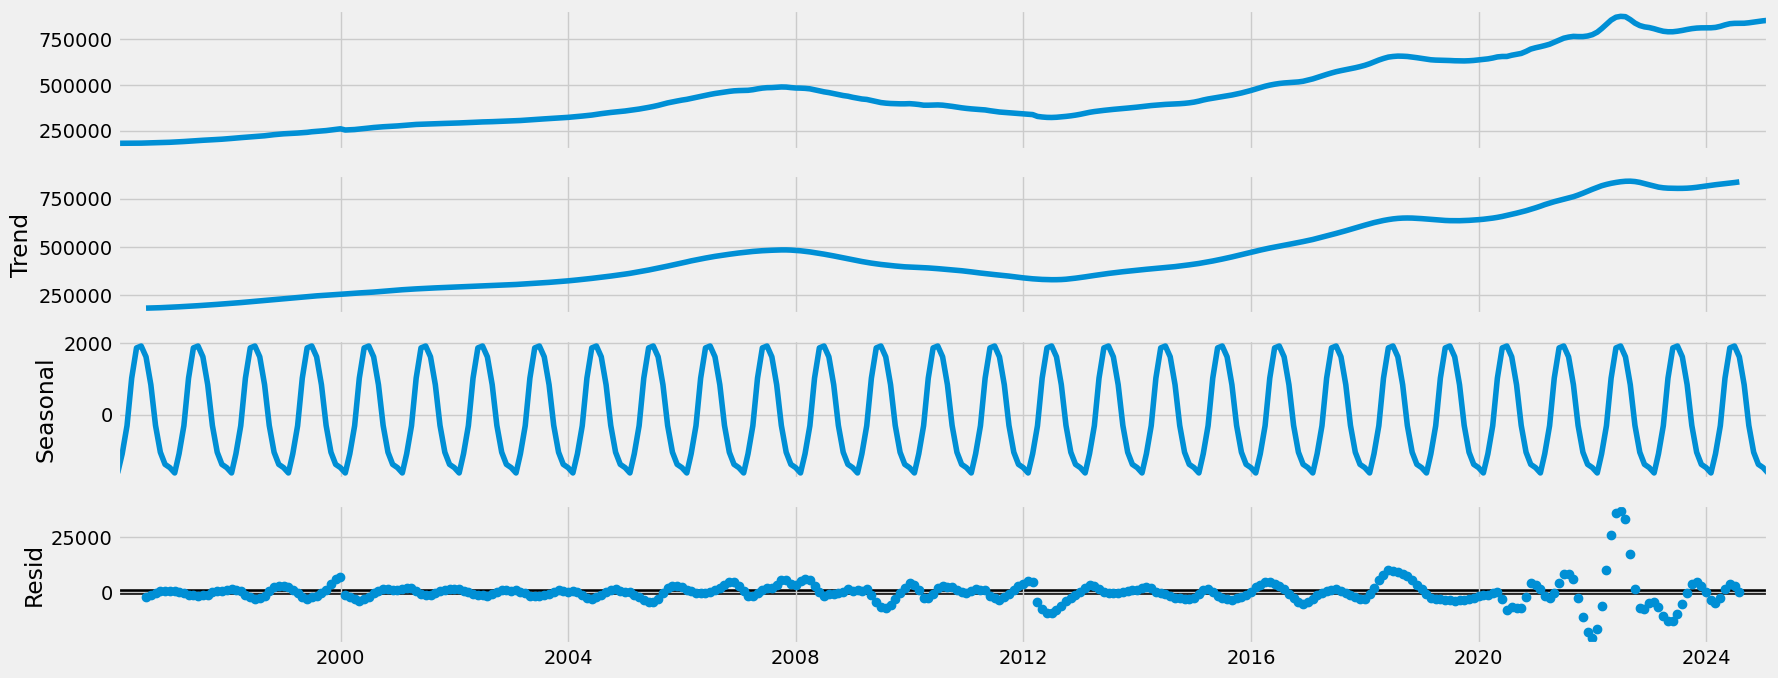

In [40]:
decomposition.plot()
plt.show()

The housing prices in King County have shown a dominant upward trend over the years, except for a slight decline from 2008 to 2012, most likely caused by the financial crisis. This period can be considered an economic cycle. Another shorter cycle can be observed between 2019 and 2020, likely influenced by early pandemic-related shocks.

The data also shows seasonal fluctuations throughout the year.

Additionally, there is noticeable noise in the data between 2020 and 2024, likely resulting from the combined effects of the COVID-19 pandemic and high inflation.

### Testing for stationarity

In [41]:
# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
# Apply the test using the function on the time series
dickey_fuller(king_county_avg_price['value'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.055396
p-value                          0.962880
Number of Lags Used              6.000000
Number of Observations Used    342.000000
Critical Value (1%)             -3.449616
Critical Value (5%)             -2.870028
Critical Value (10%)            -2.571292
dtype: float64


A Dickey-Fuller test was performed to check for the presence of a unit root in the data. The presence of a unit root indicates that the data is non-stationary.

Null hypothesis - The data has a unit root (non-stationary).

Alternative hypothesis - The data has no unit root (stationary).

The test statistic is 0.055396, which is larger than the critical value. Thus, I can't reject the null hypothesis

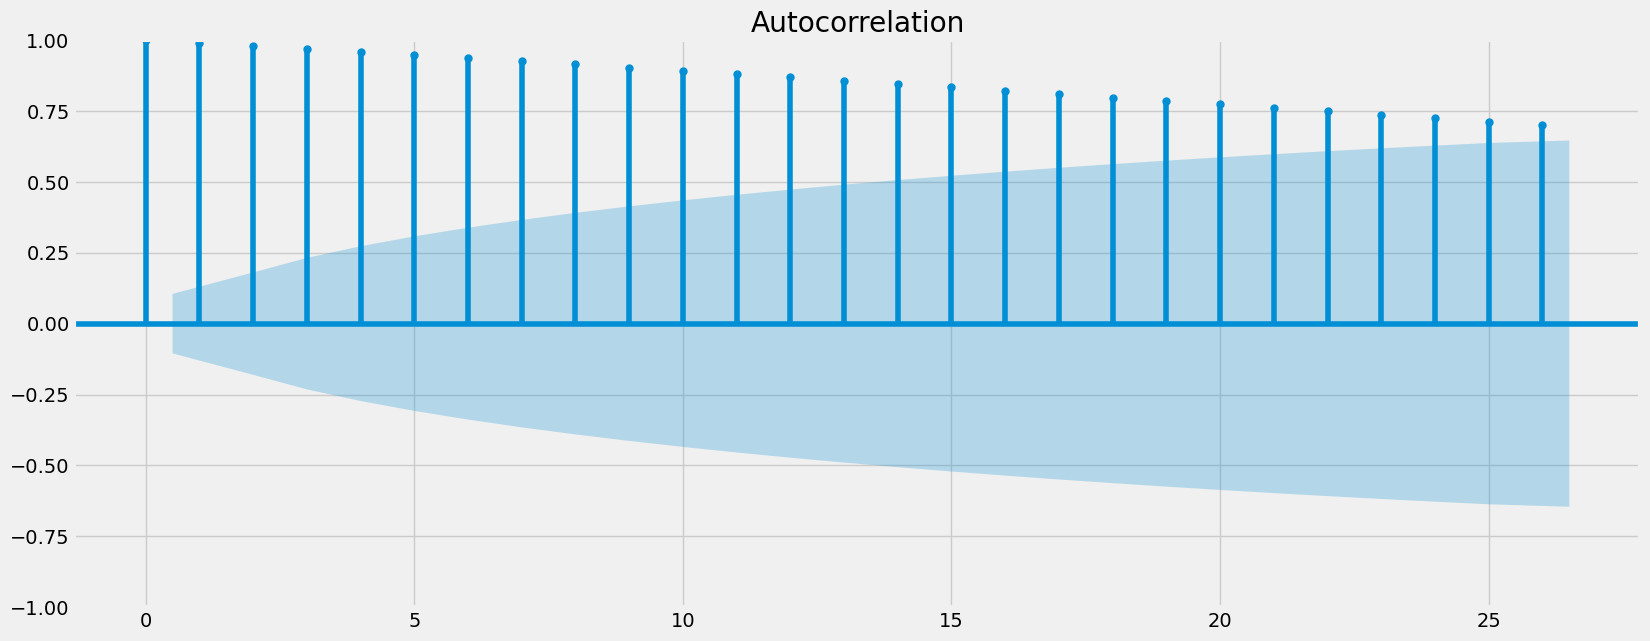

In [42]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(king_county_avg_price)
plt.show()

The autocorrelation plot shows that several lags extend beyond the confidence interval, indicating that these lags are significantly correlated with each other. This pattern suggests that the data is non-stationary.

###  Stationarizing the Data

In [43]:
# Conducting the differencing
data_diff = king_county_avg_price - king_county_avg_price.shift(1) 

In [44]:
data_diff.dropna(inplace = True) 

In [45]:
data_diff.head()

,value
datetime,
1996-02-29,131.107143
1996-03-31,48.678571
1996-04-30,55.321429
1996-05-31,16.535714
1996-06-30,563.071429


In [46]:
data_diff.columns

Index(['value'], dtype='object')

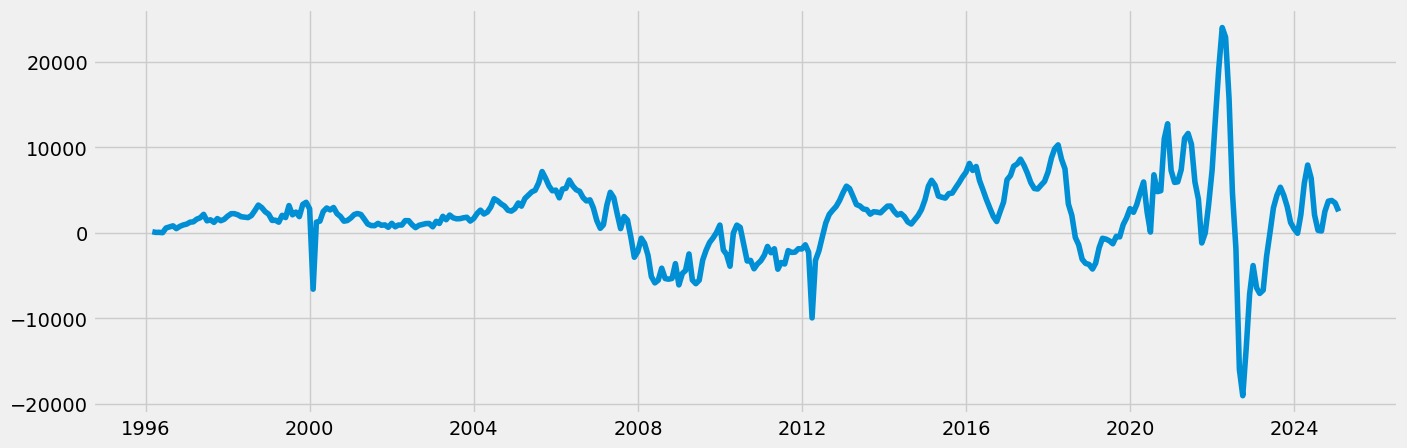

In [47]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [48]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.438990
p-value                          0.000253
Number of Lags Used              5.000000
Number of Observations Used    342.000000
Critical Value (1%)             -3.449616
Critical Value (5%)             -2.870028
Critical Value (10%)            -2.571292
dtype: float64


The test statistic is smaller than the critical value, which means that, at a 1% significance level, I can reject the null hypothesis.

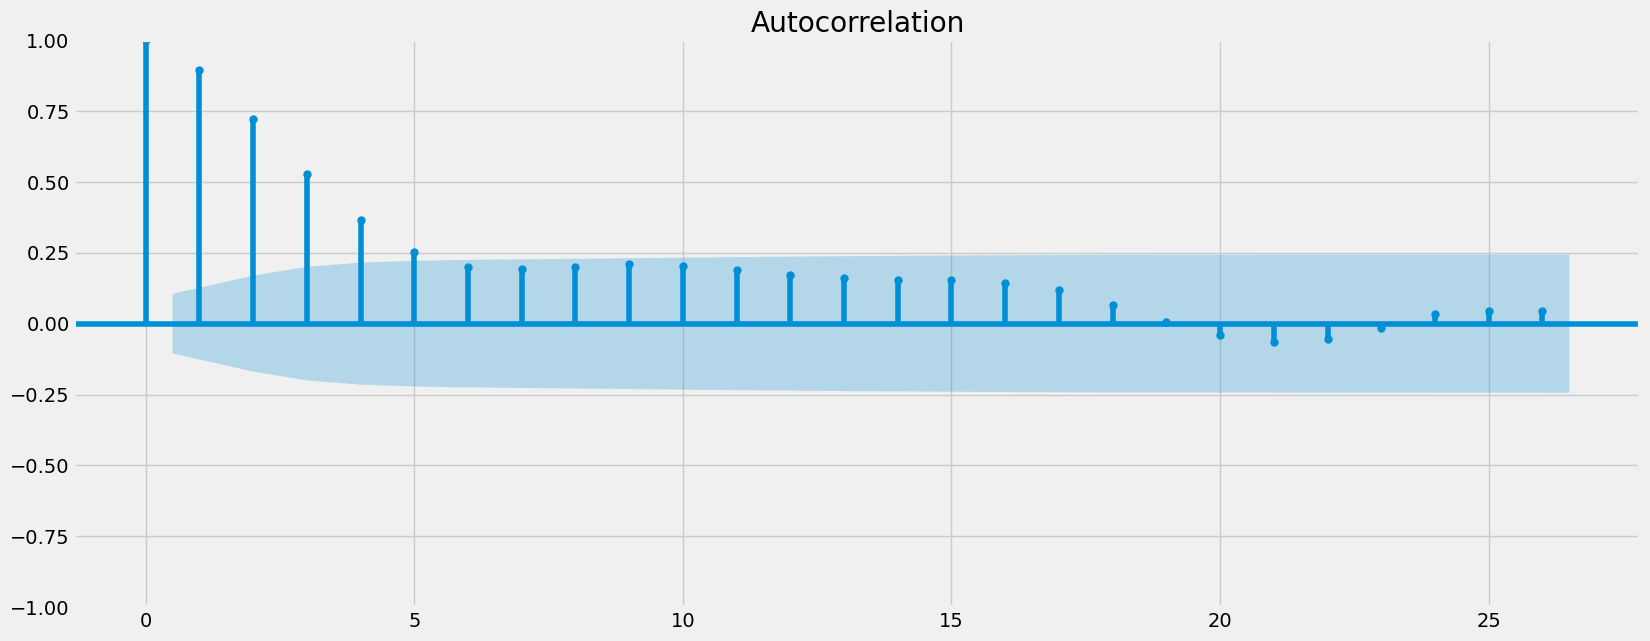

In [49]:
plot_acf(data_diff)
plt.show()

The autocorrelation plot shows some improvement, however it is not fully ideal. This suggests that, although the Dickey-Fuller test indicates stationarity, the strength of that stationarity is limited. A second differencing is unnecessary, as the series has only six significant lags, below the typical threshold of ten.